# XAI - Actividad 4

Grupo 1:
<ul>
<li>Lidia Abad Azcutia</li>
<li>Sergio Arroni del Riego</li>
<li>David González Fernández</li>
</ul>

In [109]:
# @title Imports
from sklearn.ensemble import GradientBoostingClassifier
from ucimlrepo import fetch_ucirepo
import shap
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from lime import lime_tabular
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [110]:
# @title Seed
seed = 0
random.seed(seed)
np.random.seed(seed)

In [111]:
# @title fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

In [112]:
# @title Split data
print(X.shape)

print(y.shape)

print(X.columns)

(4601, 57)
(4601, 1)
Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'wo

In [113]:
# @title metadata
print(spambase.metadata)

# variable information
print(spambase.variables)

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [114]:
# @title Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [115]:
# @title Function to make pipeline
def get_model():
    return make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=seed))

In [116]:
# @title Build a GradientBoostingClassifier model
pipa = get_model()
pipa.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=0))])

In [117]:
# @title Make predictions on the test set
y_pred = pipa.predict(X_test)

In [118]:
# @title Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


In [119]:
# @title create shap explainer
explainer = shap.TreeExplainer(pipa.named_steps["gradientboostingclassifier"])
shap_values = explainer.shap_values(X_test)

In [120]:
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc:.3f}")

AUC: 0.932


In [121]:
# @title Print SHAP values
print("SHAP Values:")
print(shap_values[0])

SHAP Values:
[-2.01985312e-04 -2.67542098e-04  3.21023616e-03 -1.40160741e-04
  9.71479698e-02 -2.56483133e-02  1.06271505e+00 -1.43780336e-02
 -2.94578088e-05  5.00530873e-02 -1.11529576e-02  1.23421236e-02
  6.88363917e-04 -6.40951066e-03 -3.61803950e-02  1.06965848e-01
 -2.36914765e-01 -3.77128720e-04 -1.75827836e-02 -3.40490175e-02
 -4.55004726e-02 -1.55779491e-02  2.72513236e-01  3.02210283e-01
 -1.27499624e+00 -6.05001196e-02 -1.87004762e+00 -3.56408023e-02
  0.00000000e+00  6.54449896e-04  0.00000000e+00  0.00000000e+00
  2.68287589e-04  0.00000000e+00  0.00000000e+00 -1.43726300e-03
 -3.06523788e-01  0.00000000e+00  4.22944341e-03  0.00000000e+00
  0.00000000e+00  3.39137001e-02  0.00000000e+00 -2.04719063e-02
  7.03684654e-03 -1.34994176e+00  0.00000000e+00  1.04965417e-02
 -5.83489640e-03  1.67319717e-02  5.90307743e-05  1.02967274e+00
  8.18212479e-01  1.63185296e-05  2.77847906e-01 -4.27229211e-02
  7.71821501e-01]


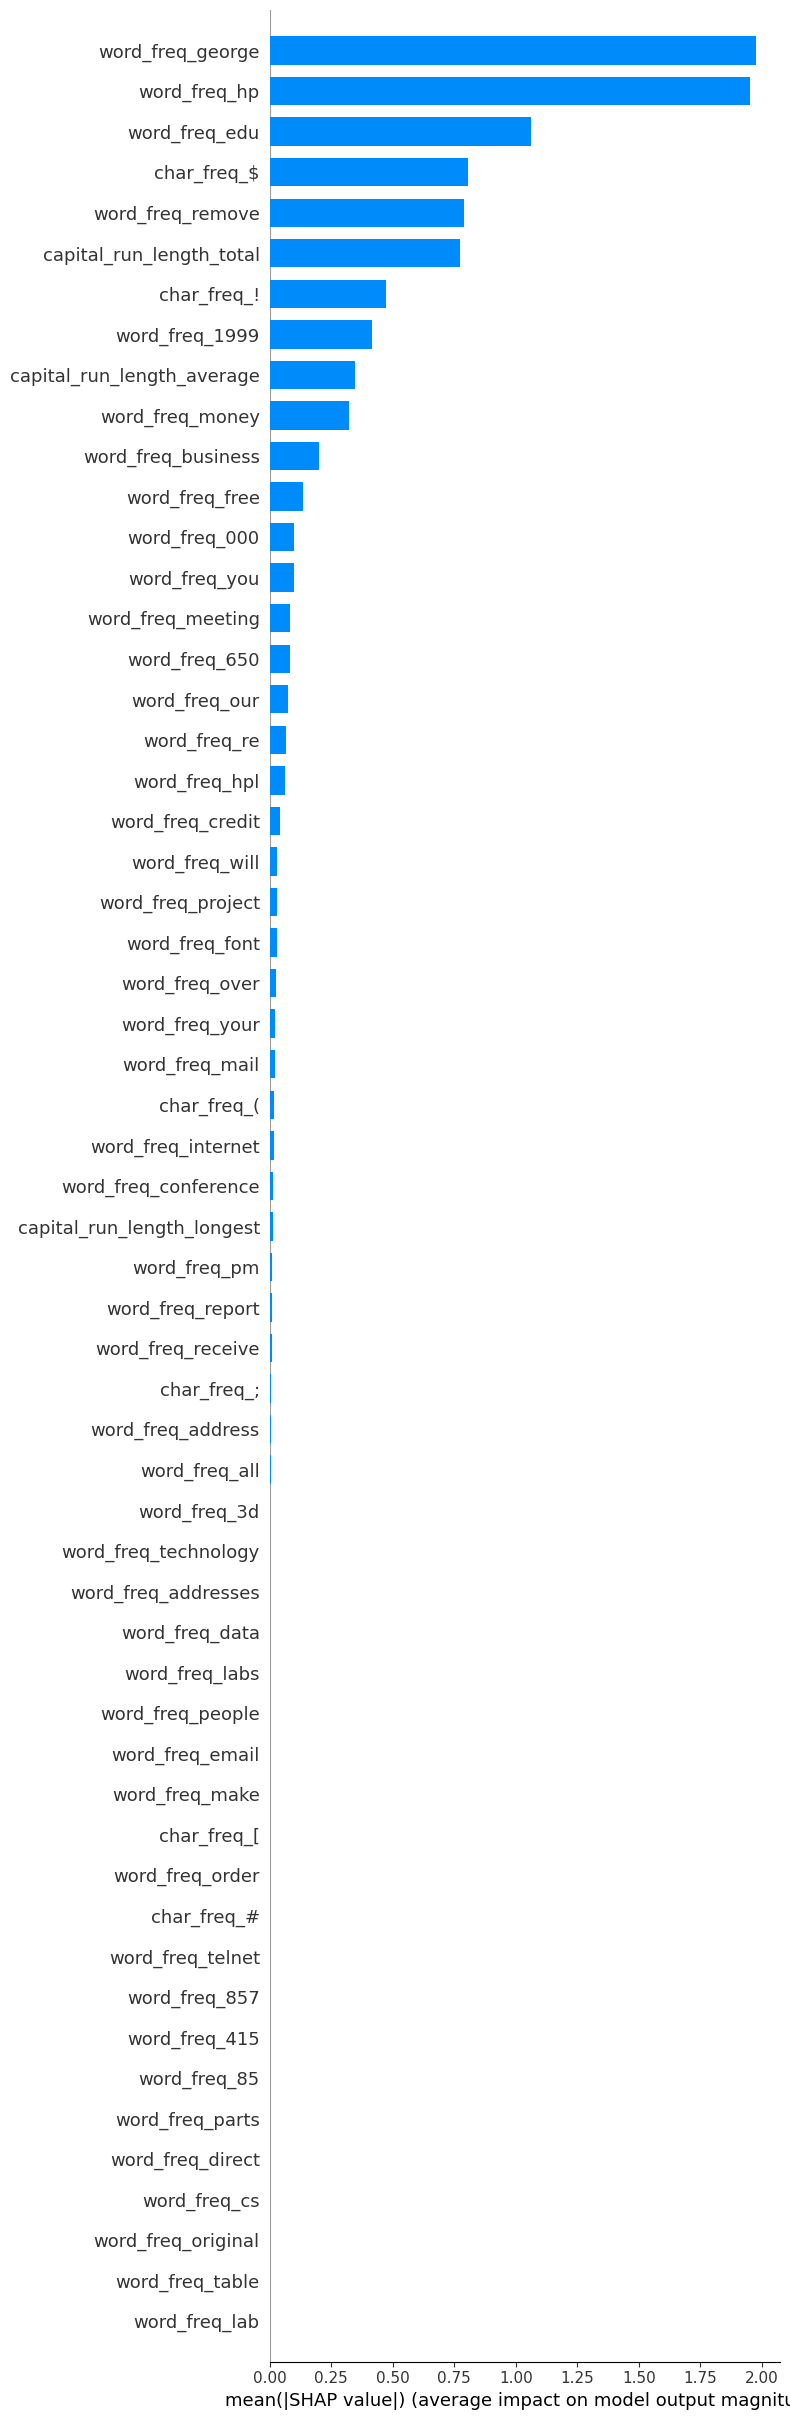

In [122]:
# @title Plot SHAP summary plot
shap.summary_plot(
    shap_values,
    X_test,
    feature_names=X_test.columns,
    plot_type="bar",
    max_display=X_train.shape[1],
)
plt.show()

In [123]:
# @title create LIME explainer
explainer_lime = lime_tabular.LimeTabularExplainer(
    X_train.values, feature_names=X_train.columns, class_names=["0", "1"]
)
lime_exp = explainer_lime.explain_instance(
    X_test.iloc[0].values, pipa.predict_proba, num_features=X_train.shape[1]
)

X does not have valid feature names, but StandardScaler was fitted with feature names


In [124]:
print("LIME Values:")
print(lime_exp.as_list())

LIME Values:
[('word_freq_george <= 0.00', 0.3266562241531232), ('word_freq_hp <= 0.00', 0.2945297210030656), ('word_freq_remove > 0.00', 0.2654207991024768), ('word_freq_edu > 0.00', -0.22308204976597873), ('char_freq_! > 0.31', 0.21991748024618799), ('char_freq_$ > 0.05', 0.1998758113519648), ('word_freq_meeting <= 0.00', 0.18694650121242593), ('word_freq_money > 0.00', 0.12504010851203687), ('word_freq_our > 0.38', 0.10926000810166886), ('capital_run_length_average > 3.70', 0.08420035164683824), ('word_freq_conference <= 0.00', 0.07996412205843316), ('word_freq_1999 <= 0.00', 0.07543495793199514), ('word_freq_font <= 0.00', -0.07439873319693932), ('word_freq_business <= 0.00', -0.0709781725980887), ('word_freq_000 > 0.00', 0.05795906582641349), ('word_freq_internet <= 0.00', -0.05289918722044187), ('word_freq_650 <= 0.00', -0.04966917363365146), ('word_freq_project <= 0.00', 0.04696982727198097), ('capital_run_length_total > 261.00', 0.039724184614107885), ('0.00 < word_freq_re <= 0

In [125]:
# @title Extract attribute names without '>' or '<' symbols
lime_attribute_names = []

for entry, _ in lime_exp.as_list():
    parts = entry.split()
    if parts[0].replace(".", "", 1).isdigit():
        # If the first element is a number, use the second element as the name
        lime_attribute_names.append(parts[2])
    else:
        # If the first element is not a number, use it as the name
        lime_attribute_names.append(parts[0])

# Print attribute names
print("Attribute names used by LIME:")
for attribute in lime_attribute_names:
    print(attribute)

Attribute names used by LIME:
word_freq_george
word_freq_hp
word_freq_remove
word_freq_edu
char_freq_!
char_freq_$
word_freq_meeting
word_freq_money
word_freq_our
capital_run_length_average
word_freq_conference
word_freq_1999
word_freq_font
word_freq_business
word_freq_000
word_freq_internet
word_freq_650
word_freq_project
capital_run_length_total
word_freq_re
capital_run_length_longest
word_freq_technology
word_freq_pm
word_freq_your
word_freq_cs
char_freq_;
word_freq_over
word_freq_report
word_freq_original
word_freq_table
word_freq_people
word_freq_telnet
word_freq_free
word_freq_3d
word_freq_order
word_freq_parts
word_freq_you
word_freq_data
word_freq_credit
word_freq_mail
word_freq_addresses
char_freq_#
word_freq_will
word_freq_415
word_freq_direct
word_freq_lab
word_freq_hpl
word_freq_all
word_freq_make
word_freq_email
word_freq_address
word_freq_85
word_freq_857
word_freq_labs
word_freq_receive
char_freq_[
char_freq_(


In [126]:
# @title Print LIME explanation
print("\nLIME Explanation:")
lime_exp.show_in_notebook()

# lime_exp.as_pyplot_figure()

# lime_exp.save_to_file("lime_exp.html")


LIME Explanation:


In [127]:
# @title Make a dictionary of feature names
feature_dict = {index: feature for index, feature in enumerate(X.columns)}
print(feature_dict)

{0: 'word_freq_make', 1: 'word_freq_address', 2: 'word_freq_all', 3: 'word_freq_3d', 4: 'word_freq_our', 5: 'word_freq_over', 6: 'word_freq_remove', 7: 'word_freq_internet', 8: 'word_freq_order', 9: 'word_freq_mail', 10: 'word_freq_receive', 11: 'word_freq_will', 12: 'word_freq_people', 13: 'word_freq_report', 14: 'word_freq_addresses', 15: 'word_freq_free', 16: 'word_freq_business', 17: 'word_freq_email', 18: 'word_freq_you', 19: 'word_freq_credit', 20: 'word_freq_your', 21: 'word_freq_font', 22: 'word_freq_000', 23: 'word_freq_money', 24: 'word_freq_hp', 25: 'word_freq_hpl', 26: 'word_freq_george', 27: 'word_freq_650', 28: 'word_freq_lab', 29: 'word_freq_labs', 30: 'word_freq_telnet', 31: 'word_freq_857', 32: 'word_freq_data', 33: 'word_freq_415', 34: 'word_freq_85', 35: 'word_freq_technology', 36: 'word_freq_1999', 37: 'word_freq_parts', 38: 'word_freq_pm', 39: 'word_freq_direct', 40: 'word_freq_cs', 41: 'word_freq_meeting', 42: 'word_freq_original', 43: 'word_freq_project', 44: 'wo

In [128]:
# @title Function to calculate feature insertion metrics
def calculate_feature_insertion_metrics(X_test, y_test, feature_order, method="shap"):
    feature_insertion = {}
    X_subset = pd.DataFrame()

    for ele in feature_order:
        feature = feature_dict[ele]
        print(f"La variable insertada es: {feature}")

        if method == "shap":
            X_subset = pd.concat([X_subset, X_test[feature]], axis=1, ignore_index=True)
        elif method == "lime":
            X_subset = pd.concat([X_subset, X_test[feature]], axis=1, ignore_index=True)
        else:
            raise ValueError("Invalid method. Use 'shap' or 'lime'.")

        model_insertion = get_model()
        model_insertion.fit(X_subset, y_test.values.ravel())
        y_pred = model_insertion.predict(X_subset)

        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)  # AUC

        feature_insertion[feature] = {
            "accuracy": accuracy,
            "auc": auc,
            "feature_order": ele,
        }

    return feature_insertion

In [129]:
# @title Get feature importance order from SHAP values
shap_feature_order = np.argsort(np.abs(np.mean(shap_values, axis=0).astype(float)))[
    ::-1
]

In [130]:
# @title Calculate accuracies for feature insertion using SHAP
print("SHAP")
feature_insertion_shap = calculate_feature_insertion_metrics(
    X_test, y_test, shap_feature_order, method="shap"
)

SHAP
La variable insertada es: word_freq_george
La variable insertada es: word_freq_hp
La variable insertada es: word_freq_edu
La variable insertada es: char_freq_$
La variable insertada es: word_freq_remove
La variable insertada es: capital_run_length_total
La variable insertada es: char_freq_!
La variable insertada es: word_freq_1999
La variable insertada es: capital_run_length_average
La variable insertada es: word_freq_money
La variable insertada es: word_freq_business
La variable insertada es: word_freq_free
La variable insertada es: word_freq_you
La variable insertada es: word_freq_000
La variable insertada es: word_freq_our
La variable insertada es: word_freq_hpl
La variable insertada es: word_freq_credit
La variable insertada es: word_freq_meeting
La variable insertada es: word_freq_project
La variable insertada es: word_freq_over
La variable insertada es: word_freq_will
La variable insertada es: word_freq_re
La variable insertada es: word_freq_650
La variable insertada es: wor

In [131]:
# @title AUC for feature insertion using SHAP
last_key = list(feature_insertion_shap.keys())[-1]
print(f"AUC for {last_key}: {feature_insertion_shap[last_key]['auc']:.3f}")

AUC for word_freq_lab: 0.983


In [132]:
# @title Get feature importance order from SHAP values
features_shap = list(feature_insertion_shap.keys())

# Get feature indices
feature_indices_shap = [
    str(X_test.columns.get_loc(feature)) for feature in features_shap
]

accuracies_shap = [result["accuracy"] for result in feature_insertion_shap.values()]
auc_scores_shap = [result["auc"] for result in feature_insertion_shap.values()]
features_list_shap = [
    result["feature_order"] for result in feature_insertion_shap.values()
]

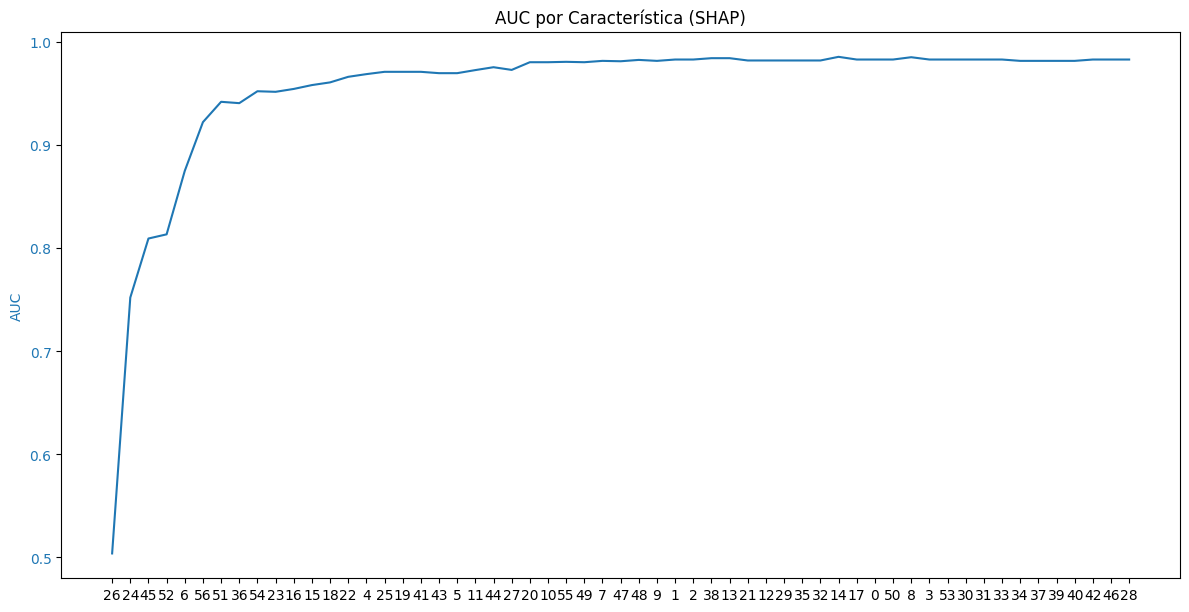

In [133]:
# @title Plot AUC for feature insertion using SHAP
fig, ax1 = plt.subplots(figsize=(12, 6))  # Increase the figsize to adjust the image size

color = "tab:blue"
ax1.set_ylabel("AUC", color=color)
ax1.plot(
    feature_indices_shap, auc_scores_shap, color=color
)  # Use feature_indices instead of features
ax1.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.title("AUC por Característica (SHAP)")
plt.show()

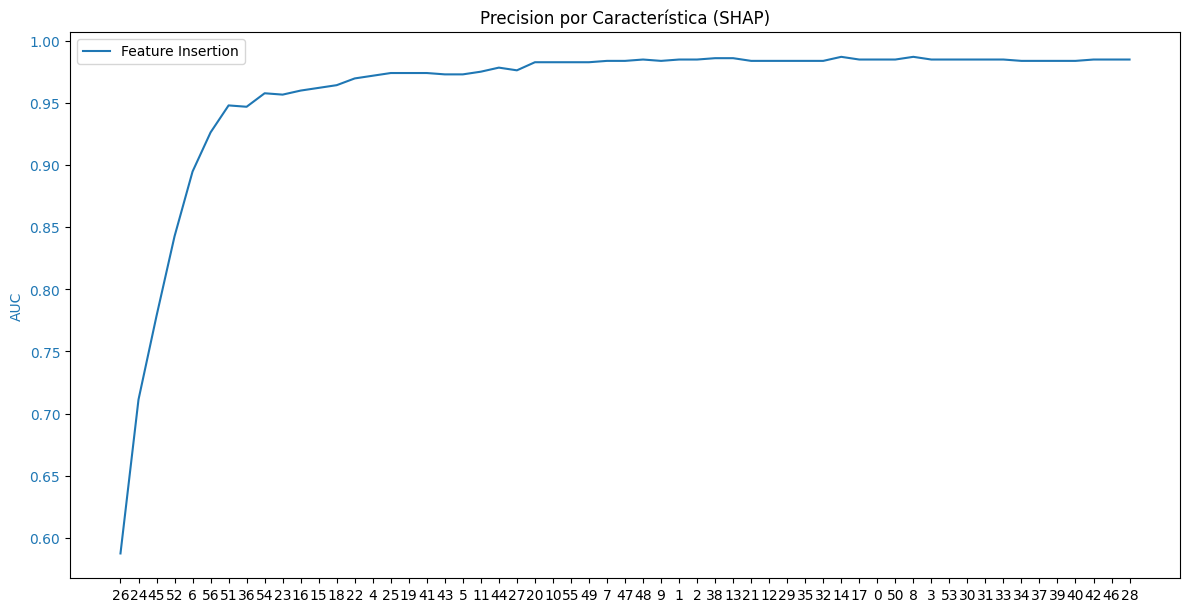

In [134]:
# @title Plot accuracies for feature insertion using SHAP
fig, ax1 = plt.subplots(figsize=(12, 6))

color = "tab:blue"
ax1.set_ylabel("AUC", color=color)
ax1.plot(
    feature_indices_shap, accuracies_shap, color=color
)  # Use feature_indices instead of features
ax1.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.title("Precision por Característica (SHAP)")
plt.legend(["Feature Insertion"])
plt.show()

In [135]:
# @title Get feature importance order from LIME values
lime_feature_order = [list(feature_dict.keys())[list(feature_dict.values()).index(attribute)] for attribute in lime_attribute_names]
print(lime_feature_order)


[26, 24, 6, 45, 51, 52, 41, 23, 4, 54, 47, 36, 21, 16, 22, 7, 27, 43, 56, 44, 55, 35, 38, 20, 40, 48, 5, 13, 42, 46, 12, 30, 15, 3, 8, 37, 18, 32, 19, 9, 14, 53, 11, 33, 39, 28, 25, 2, 0, 17, 1, 34, 31, 29, 10, 50, 49]


In [136]:
# @title Calculate accuracies for feature insertion using LIME
print("LIME")
feature_insertion_lime = calculate_feature_insertion_metrics(
    X_test, y_test, lime_feature_order, method="lime"
)

LIME
La variable insertada es: word_freq_george
La variable insertada es: word_freq_hp
La variable insertada es: word_freq_remove
La variable insertada es: word_freq_edu
La variable insertada es: char_freq_!
La variable insertada es: char_freq_$
La variable insertada es: word_freq_meeting
La variable insertada es: word_freq_money
La variable insertada es: word_freq_our
La variable insertada es: capital_run_length_average
La variable insertada es: word_freq_conference
La variable insertada es: word_freq_1999
La variable insertada es: word_freq_font
La variable insertada es: word_freq_business
La variable insertada es: word_freq_000
La variable insertada es: word_freq_internet
La variable insertada es: word_freq_650
La variable insertada es: word_freq_project
La variable insertada es: capital_run_length_total
La variable insertada es: word_freq_re
La variable insertada es: capital_run_length_longest
La variable insertada es: word_freq_technology
La variable insertada es: word_freq_pm
La 

In [137]:
# @title AUC for feature insertion using SHAP
last_key = list(feature_insertion_lime.keys())[-1]
print(f"AUC for {last_key}: {feature_insertion_lime[last_key]['auc']:.3f}")

AUC for char_freq_(: 0.983


In [138]:
# @title Get feature importance order from LIME values
features_lime = list(feature_insertion_lime.keys())

# Get the indices of the features in X_test
feature_indices_lime = [
    str(X_test.columns.get_loc(feature)) for feature in features_lime
]

accuracies_lime = [result["accuracy"] for result in feature_insertion_lime.values()]
auc_scores_lime = [result["auc"] for result in feature_insertion_lime.values()]
features_list_lime = [
    result["feature_order"] for result in feature_insertion_lime.values()
]

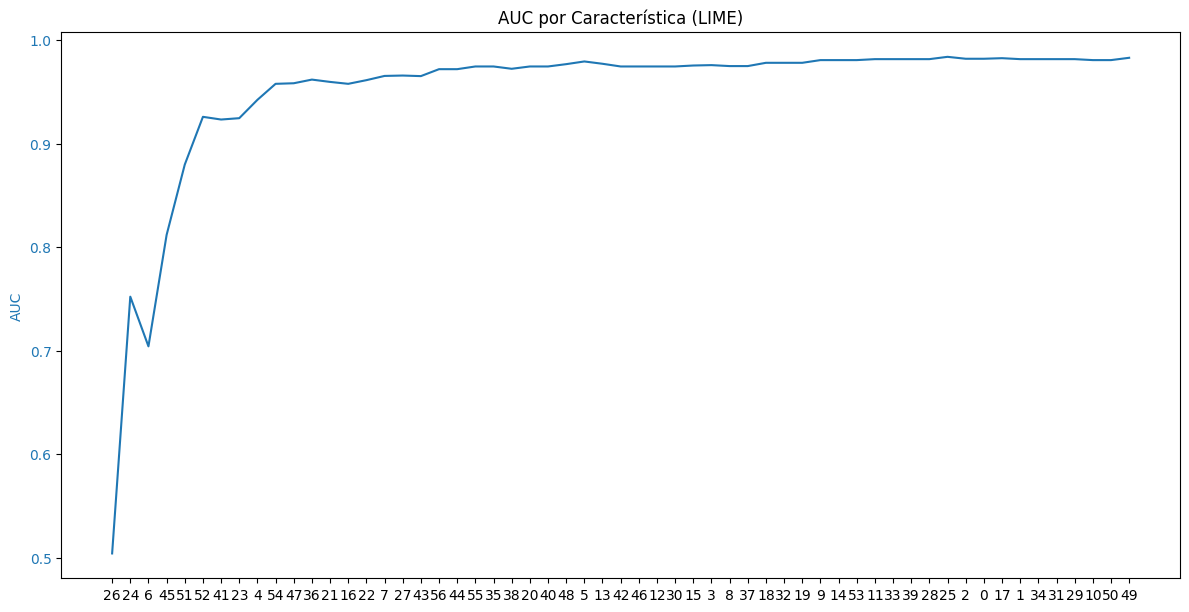

In [139]:
# @title Plot accuracies for feature insertion using LIME
fig, ax1 = plt.subplots(figsize=(12, 6))

color = "tab:blue"
ax1.set_ylabel("AUC", color=color)
ax1.plot(
    feature_indices_lime, auc_scores_lime, color=color
)  # Use feature_indices instead of features
ax1.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.title("AUC por Característica (LIME)")
plt.show()

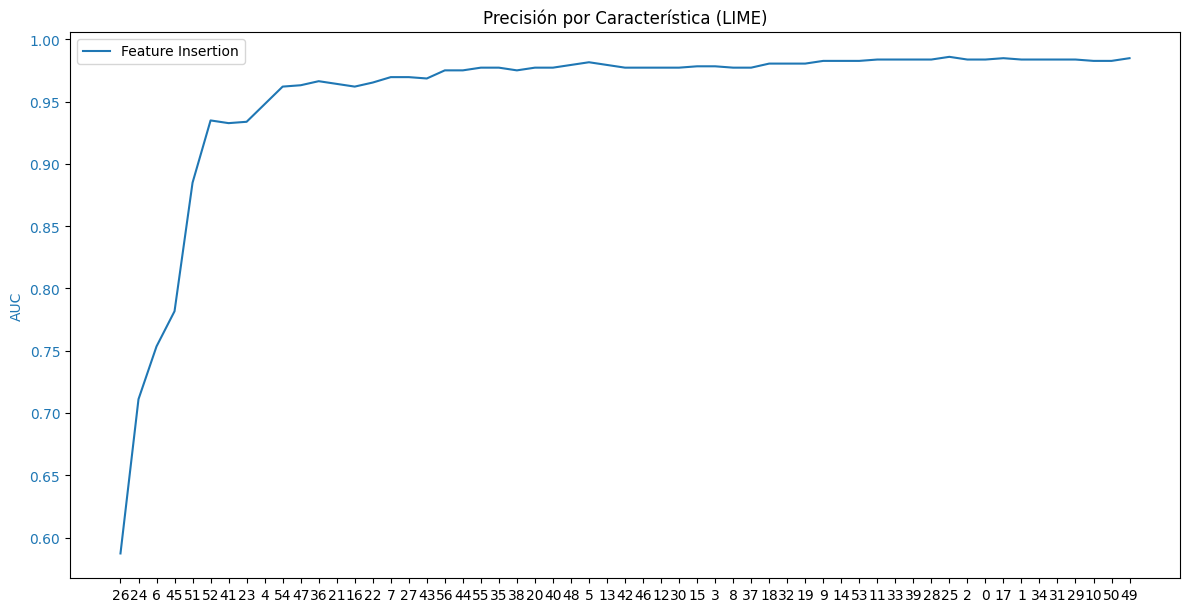

In [140]:
# @title Plot AUC for feature insertion using LIME
fig, ax1 = plt.subplots(figsize=(12, 6))

color = "tab:blue"
ax1.set_ylabel("AUC", color=color)
ax1.plot(
    feature_indices_lime, accuracies_lime, color=color
)  # Use feature_indices instead of features
ax1.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.title("Precisión por Característica (LIME)")
plt.legend(["Feature Insertion"])
plt.show()

In [141]:
# @title Random feature selection
random_feature_selections_shap = np.random.permutation(
    list(map(int, feature_indices_shap))
)
print(random_feature_selections_shap)

[49 54 30 20 38  6 25  7 53 39 22  9  0 27 31 56 26  3 17 33 50 41 15 44
 19 55  8 29 48 52 24  5 43  4 14 23 10 42 12  2  1 45 46 37 35 40 16 32
 51 18 13 28 21 11 47 36 34]


In [142]:
# @title Calculate metrics for feature insertion using SHAP
print("SHAP")
shap_feature_insertion_random = calculate_feature_insertion_metrics(
    X_test, y_test, random_feature_selections_shap, method="shap"
)

SHAP
La variable insertada es: char_freq_(
La variable insertada es: capital_run_length_average
La variable insertada es: word_freq_telnet
La variable insertada es: word_freq_your
La variable insertada es: word_freq_pm
La variable insertada es: word_freq_remove
La variable insertada es: word_freq_hpl
La variable insertada es: word_freq_internet
La variable insertada es: char_freq_#
La variable insertada es: word_freq_direct
La variable insertada es: word_freq_000
La variable insertada es: word_freq_mail
La variable insertada es: word_freq_make
La variable insertada es: word_freq_650
La variable insertada es: word_freq_857
La variable insertada es: capital_run_length_total
La variable insertada es: word_freq_george
La variable insertada es: word_freq_3d
La variable insertada es: word_freq_email
La variable insertada es: word_freq_415
La variable insertada es: char_freq_[
La variable insertada es: word_freq_meeting
La variable insertada es: word_freq_free
La variable insertada es: word_f

In [143]:
# @title AUC for feature insertion using SHAP
last_key = list(shap_feature_insertion_random.keys())[-1]
print(f"AUC for {last_key}: {shap_feature_insertion_random[last_key]['auc']:.3f}")

AUC for word_freq_85: 0.983


In [144]:
# @title Get feature importance order from SHAP values
features_random_shap = list(feature_insertion_shap.keys())

# Get feature indices
feature_indices_random_shap = [
    str(X_test.columns.get_loc(feature)) for feature in features_random_shap
]

accuracies_shap_random = [
    result["accuracy"] for result in shap_feature_insertion_random.values()
]
auc_scores_shap_random = [
    result["auc"] for result in shap_feature_insertion_random.values()
]
features_list_shap_random = [
    result["feature_order"] for result in shap_feature_insertion_random.values()
]

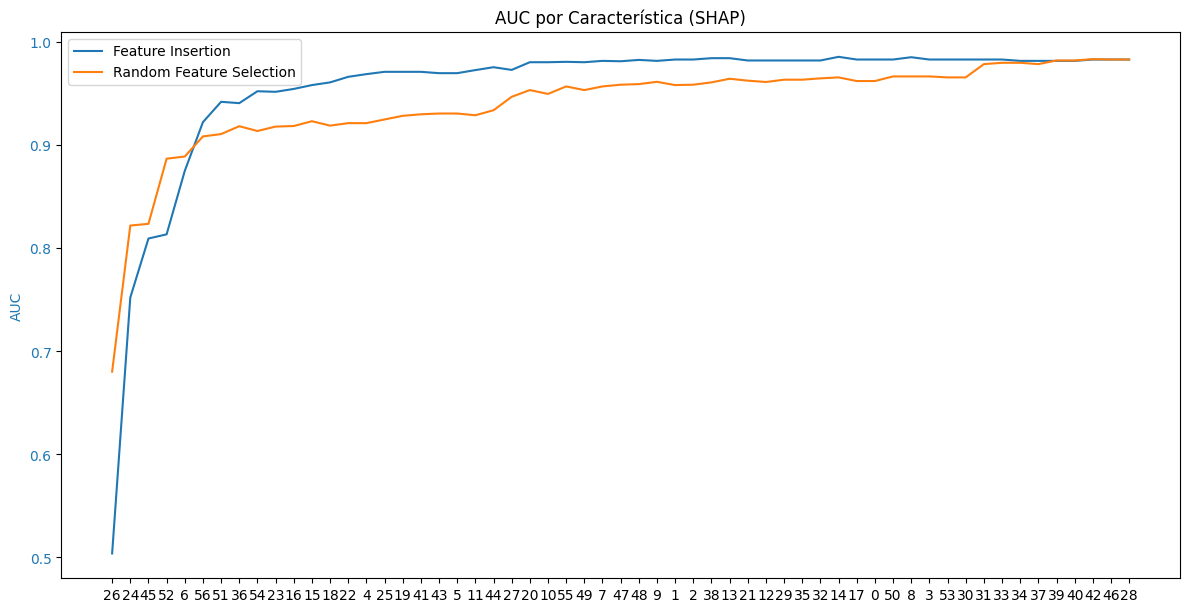

In [145]:
# @title Plot AUC for feature insertion using SHAP and random feature selection
fig, ax1 = plt.subplots(figsize=(12, 6))

color = "tab:blue"
ax1.set_ylabel("AUC", color=color)
ax1.plot(
    feature_indices_shap, auc_scores_shap, color=color
)  # Use feature_indices instead of features
ax1.plot(
    feature_indices_shap, auc_scores_shap_random, color="tab:orange"
)  # Plot random feature selection AUC scores
ax1.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.title("AUC por Característica (SHAP)")
plt.legend(["Feature Insertion", "Random Feature Selection"])
plt.show()

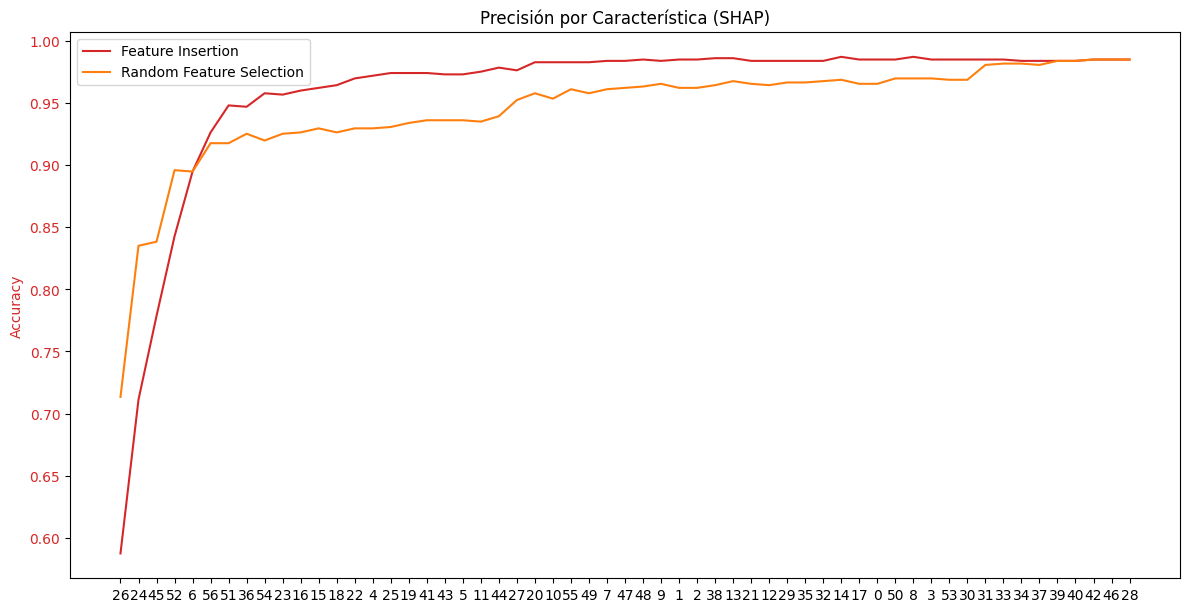

In [146]:
# @title Plot accuracies for feature insertion using SHAP and random feature selection
fig, ax1 = plt.subplots(figsize=(12, 6))

color = "tab:red"
ax1.set_ylabel("Accuracy", color=color)
ax1.plot(
    feature_indices_shap, accuracies_shap, color=color
)  # Use feature_indices instead of features
ax1.plot(
    feature_indices_shap, accuracies_shap_random, color="tab:orange"
)  # Plot random feature selection accuracies
ax1.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.title("Precisión por Característica (SHAP)")
plt.legend(["Feature Insertion", "Random Feature Selection"])
plt.show()

In [147]:
# @title Random feature selection for LIME
random_feature_selections_lime = np.random.permutation(
    list(map(int, feature_indices_lime))
)
print(random_feature_selections_lime)

[43 49 53 33 44  7 39 16 45 35 11  2  8 40 24 15 34  0 29 47 17 20  4 41
 30 37 21  1 38 32 27 50  5 52 10 19 18 42  3 22 14 13 28 25  9 46  6 31
 51 26 23 55 36 54 56 12 48]


In [148]:
# @title Calculate metrics for feature insertion using LIME
print("LIME")
lime_feature_insertion_random = calculate_feature_insertion_metrics(
    X_test, y_test, random_feature_selections_lime, method="lime"
)

LIME
La variable insertada es: word_freq_project
La variable insertada es: char_freq_(
La variable insertada es: char_freq_#
La variable insertada es: word_freq_415
La variable insertada es: word_freq_re
La variable insertada es: word_freq_internet
La variable insertada es: word_freq_direct
La variable insertada es: word_freq_business
La variable insertada es: word_freq_edu
La variable insertada es: word_freq_technology
La variable insertada es: word_freq_will
La variable insertada es: word_freq_all
La variable insertada es: word_freq_order
La variable insertada es: word_freq_cs
La variable insertada es: word_freq_hp
La variable insertada es: word_freq_free
La variable insertada es: word_freq_85
La variable insertada es: word_freq_make
La variable insertada es: word_freq_labs
La variable insertada es: word_freq_conference
La variable insertada es: word_freq_email
La variable insertada es: word_freq_your
La variable insertada es: word_freq_our
La variable insertada es: word_freq_meeting

In [149]:
# @title AUC for feature insertion using SHAP
last_key = list(lime_feature_insertion_random.keys())[-1]
print(f"AUC for {last_key}: {lime_feature_insertion_random[last_key]['auc']:.3f}")

AUC for char_freq_;: 0.983


In [150]:
# @title Get feature importance order from LIME values
features_random_lime = list(feature_insertion_lime.keys())

# Get feature indices
feature_indices_random_lime = [
    str(X_test.columns.get_loc(feature)) for feature in features_random_lime
]

accuracies_lime_random = [
    result["accuracy"] for result in lime_feature_insertion_random.values()
]
auc_scores_lime_random = [
    result["auc"] for result in lime_feature_insertion_random.values()
]
features_list_lime_random = [
    result["feature_order"] for result in lime_feature_insertion_random.values()
]

In [151]:
# @title Print AUC and accuracy scores for feature insertion using SHAP and random feature selection
print(f"AUC: {len(auc_scores_lime_random)}")
print(f"Accuracy: {len(auc_scores_lime)}")

AUC: 57
Accuracy: 57


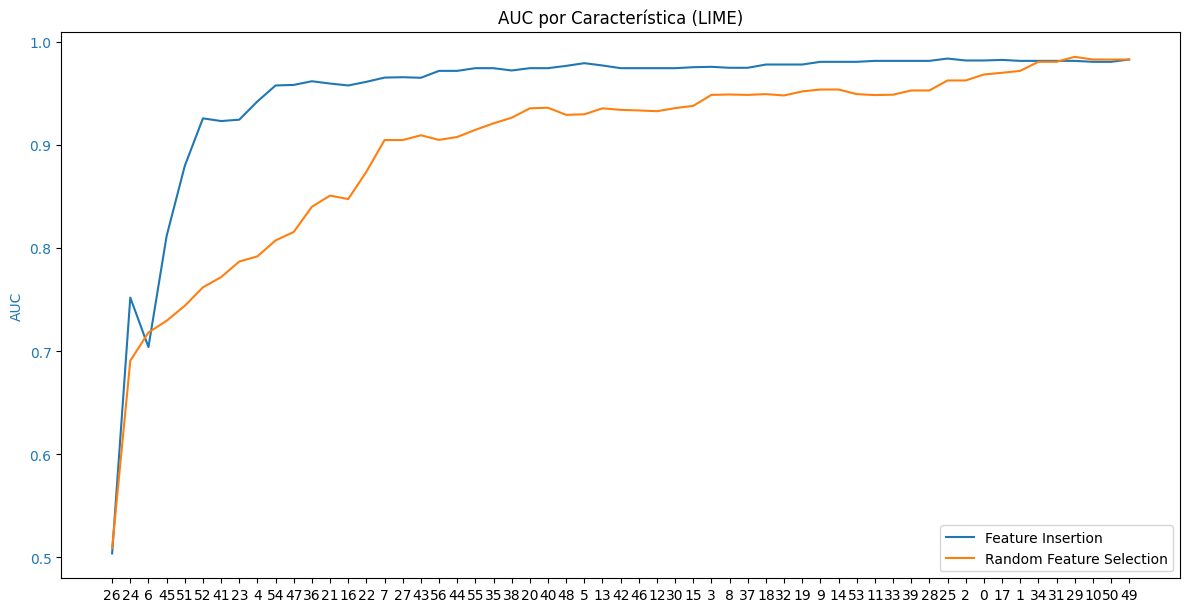

In [152]:
# @title Plot AUC for feature insertion using LIME and random feature selection
fig, ax1 = plt.subplots(figsize=(12, 6))

color = "tab:blue"
ax1.set_ylabel("AUC", color=color)
ax1.plot(
    feature_indices_lime, auc_scores_lime, color=color
)  # Use feature_indices instead of features
ax1.plot(
    feature_indices_lime, auc_scores_lime_random, color="tab:orange"
)  # Plot random feature selection AUC scores
ax1.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.title("AUC por Característica (LIME)")
plt.legend(["Feature Insertion", "Random Feature Selection"])
plt.show()

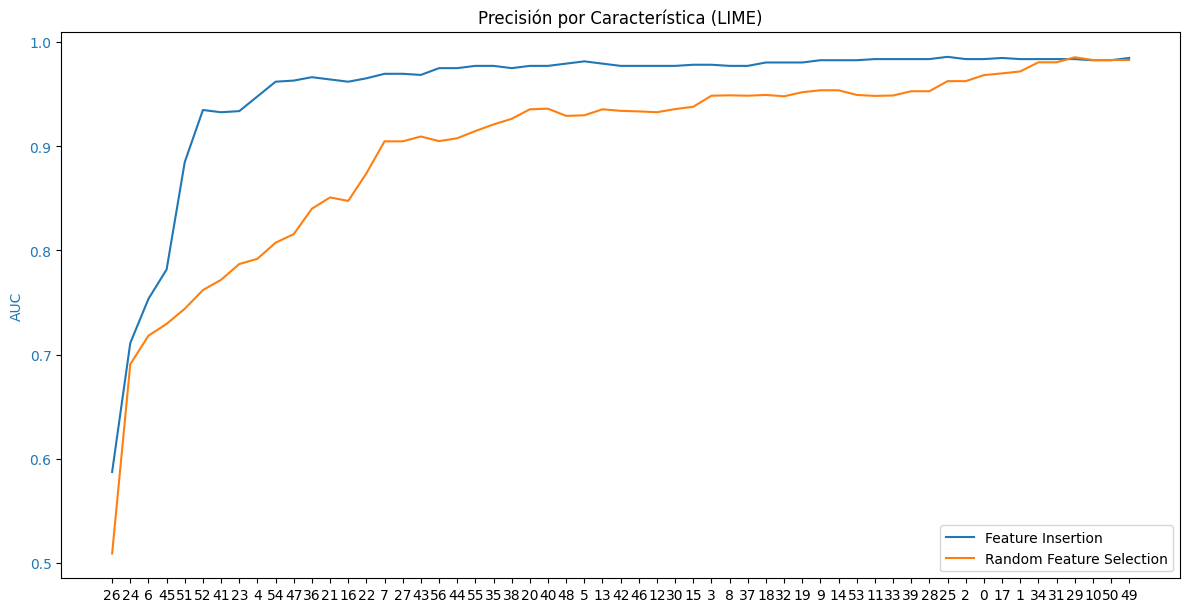

In [153]:
# @title Plot accuracies for feature insertion using LIME and random feature selection
fig, ax1 = plt.subplots(figsize=(12, 6))

color = "tab:blue"
ax1.set_ylabel("AUC", color=color)
ax1.plot(
    feature_indices_lime, accuracies_lime, color=color
)  # Use feature_indices instead of features
ax1.plot(
    feature_indices_lime, auc_scores_lime_random, color="tab:orange"
)  # Plot random feature selection AUC scores
ax1.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.title("Precisión por Característica (LIME)")
plt.legend(["Feature Insertion", "Random Feature Selection"])
plt.show()